# We have the past data 'Sample_Superstore.xls'. We have to forecast the Sales of the 'Furniture' product (given under Category column) for the upcoming one year on the basis of the past data / historical data

In [1]:
import warnings                   # import library warnings
warnings.filterwarnings('ignore')  # it will ignore warnings in the code

In [2]:
import pandas as pd 
df=pd.read_excel(r"Sample_Superstore.xls",header=0) # loading dataset 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Since, we have to predict the Sales of Furniture Category, so, we can create a new dataframe which is only having Furniture Category

In [5]:
furniture=df[df["Category"]=="Furniture"]  # furniture is new dataframe which is only having Furniture Category

In [6]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [7]:
furniture.shape

(2121, 21)

In [8]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
furniture['Order Date']=pd.to_datetime(furniture['Order Date']) #convert Order Date column into the same format of date & time 

In [10]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


Let's see from which date our data starts and where it ends. So, for this, we have to check the minimum date & maximum date using the function min() and max()

In [11]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In Time Series Analysis, we concern about 2 columns: Date, Sales i.e. at this particular date, what is the sales made by the company. So, create a new dataframe which is only having these 2 columns

In [12]:
furniture=furniture[['Order Date','Sales']]

In [13]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [14]:
furniture.shape

(2121, 2)

In [15]:
#dates in 'Order Date' column are not arranged in order. So, let's arrange them in ascending order using function sort_values()
furniture=furniture.sort_values('Order Date',ascending=True)

In [16]:
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [17]:
furniture.isnull().sum() # null values

Order Date    0
Sales         0
dtype: int64

In [18]:
# check how many entries are there for a particular date. Ideally, there should be only one entry for a particular date
furniture['Order Date'].value_counts()

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: Order Date, Length: 889, dtype: int64

Since, there should be only one entry for a particular date. So, to overcome this, we use groupby() function which combines/group the data of 'Order Date' column with the 'Sales' column to estimate the total sales for each date. It will make sure that there is only one entry for each date

In [19]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [20]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [21]:
furniture['Order Date'].value_counts()

2014-01-06    1
2016-11-23    1
2016-11-10    1
2016-11-11    1
2016-11-12    1
             ..
2015-08-02    1
2015-08-05    1
2015-08-06    1
2015-08-07    1
2017-12-30    1
Name: Order Date, Length: 889, dtype: int64

In [22]:
furniture.shape

(889, 2)

In Time series analysis, date should always be the index column and final data should have only one column which is 'Sales/Price' column

In [23]:
furniture=furniture.set_index('Order Date') # make Order Date column as index column

In [24]:
furniture # this dataset has sales on daily basis 

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


Let's convert this dataset into a new dataset which is having sales on monthly basis using function resample(). Here, we will take the average of the sales from day 1 to day 30 and put it as the sales of that month

In [25]:
y=furniture['Sales'].resample("M").mean() # resampling the data , M stands for Month

In [26]:
y    # this dataset has sales on monthly basis 

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

In [27]:
y.shape # now it's a small dataset, so, we can see the graph easily 

(48,)

<AxesSubplot:xlabel='Order Date'>

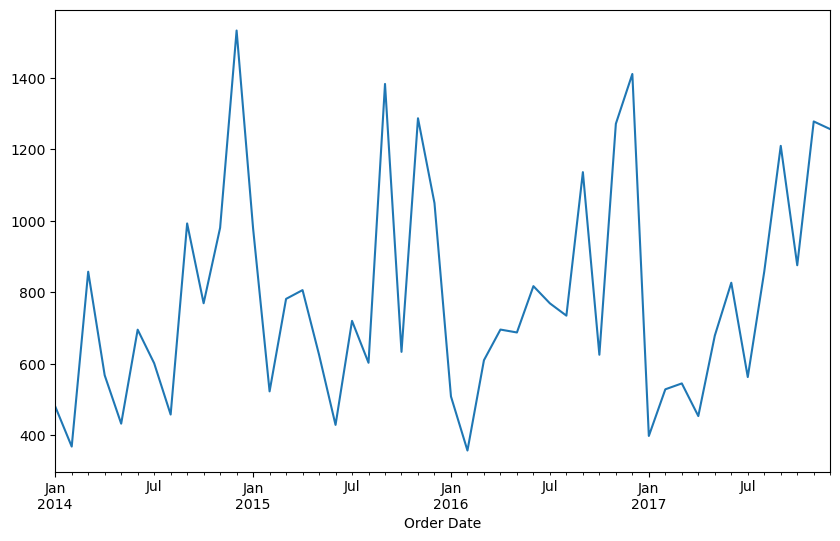

In [28]:
y.plot(figsize=(10,6))

In time series analysis, manual train & test split is done

In [29]:
#pass any random date to loc attribute. It will help us to get our training data

train=y.loc[:'2016-12-31'] #all monthly sales till 31 Dec. 2016

In [30]:
train  #training data

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [31]:
train.shape

(36,)

In [32]:
#pass the next monthly sales date to loc attribute. It will give us our testing data
test=y.loc['2017-01-31':] # monthly sales from 31 Jan 2017 till the end

In [33]:
test  # test data

Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

In [34]:
test.shape

(12,)

<AxesSubplot:title={'center':'Average Sales'}, xlabel='Order Date'>

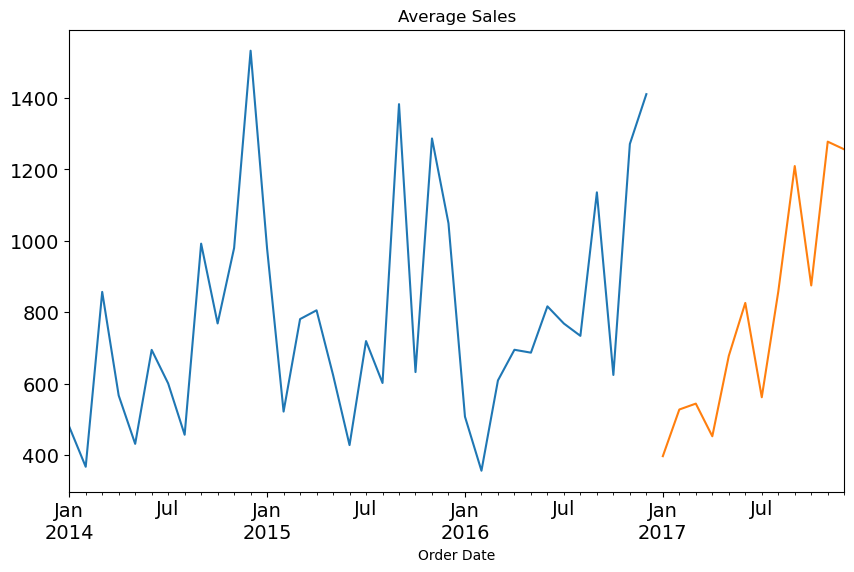

In [35]:
train.plot(figsize=(10,6),title='Average Sales',fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14) # plot test data (orange)

Using Simple exponential smoothing model, Holt's linear trend model, Holt's winter model first predict the sales of Furniture for the given test data. Choose the best model with AIC score and then using best model predict the sales of Furniture for upcoming one year

Using Simple Exponential Smoothing Model predict the sales of Furniture for the given test data

In [36]:
#smoothing level=alpha (α)
# α should be in the range of 0 to 1
# α close to 0 indicate that older values are very less imp. compared to the recent values
# α to 1 indicate that older values are equally imp.   
# So, more the α close to 0, less the importance given to older values i.e more the imp. given to recent values. 
# So,α should be low(close to 0) bec. as time goes, the trend of the data also changes ,so, our machine algo. should follow the new data trend
# α should be 0.01, 0.1 but not greater than 0.1  
from statsmodels.tsa.api import SimpleExpSmoothing 
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01) # train the model using simple exponential smoothing algo.

In [37]:
fit1

In [38]:
Exp_Smooth = test.copy()  # copy test data in var. Exp_Smooth

In [39]:
Exp_Smooth

Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

In [40]:
len(test)

12

In [41]:
#steps=len(test) because we have to compare the predicted sales with test value/ actual value 

Exp_Smooth['SES'] = fit1.forecast(steps=len(test)) # predict the sales for the given test data using the algorithm  and save in new column 'SES'

In [42]:
Exp_Smooth['SES'] # predicted sales value is 784.196954 which is same for every month of our testing data

2017-01-31    784.196954
2017-02-28    784.196954
2017-03-31    784.196954
2017-04-30    784.196954
2017-05-31    784.196954
2017-06-30    784.196954
2017-07-31    784.196954
2017-08-31    784.196954
2017-09-30    784.196954
2017-10-31    784.196954
2017-11-30    784.196954
2017-12-31    784.196954
Freq: M, dtype: float64

<AxesSubplot:title={'center':'Average Sales'}, xlabel='Order Date'>

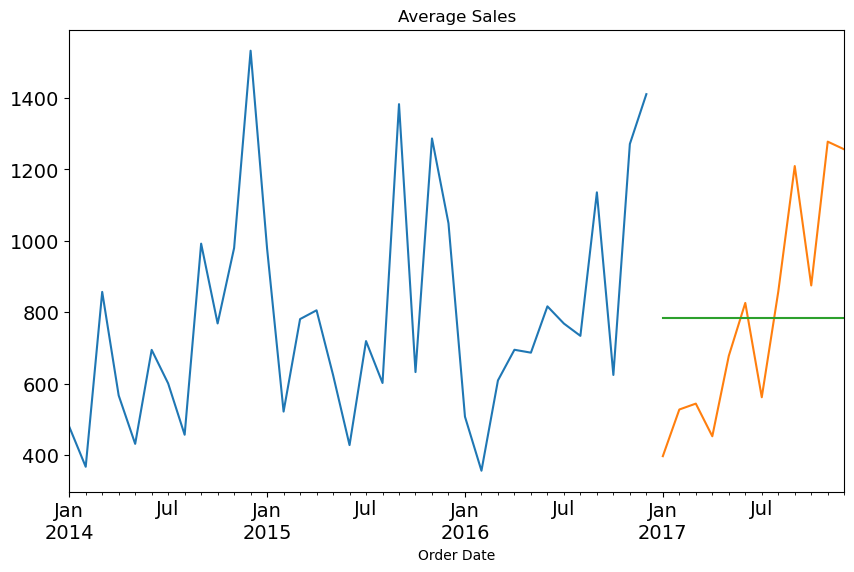

In [43]:
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot test data  (orange)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot predicted sales value (green) 

Insights: predicted sales value is almost 800 which is given by a straight line. As per graph, average sales is also 800. It means, our simple exponential smoothing model is performing same as the mean model i.e. our model is predicting the same sales value for each and every test data. So, simple exponential smoothing algo. is the worst model in time series analysis. So, let's go for Double Exponential Smoothing (Holt's linear trend Model)

In [44]:
#Model Evaluation
#AIC score is used to determine which machine learning model is best.Choose the model with lowest AIC score.
fit1.aic  # calculate AIC score of the model

415.87664216026513

In [45]:
# calculate RMSE of the model
# RMSE estimates how far the predicted values deviate from the test values(actual values) in the dataset
# choose the model with lowest RMSE score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Exp_Smooth['SES']))
print(rmse)

303.4766834364632


Using Holt's linear trend Model predict the sales of Furniture for the given test data

In [46]:
#smoothing slope = beta (β) indicates trend in the data (in the range of 0.25 to 0.5)

from statsmodels.tsa.api import Holt  
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25) # train the model using Holt's linear trend algorithm

In [47]:
fit1

In [48]:
Holt_df = test.copy() # copy test data in var. Holt_df

In [49]:
Holt_df

Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

In [50]:
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test)) #predict the sales for the given test data using the algorithm  and save in new column 'Holt_linear'

In [51]:
Holt_df['Holt_linear'] # predicted sales value for every month of our testing data

2017-01-31     934.737352
2017-02-28     943.060397
2017-03-31     951.383443
2017-04-30     959.706488
2017-05-31     968.029533
2017-06-30     976.352579
2017-07-31     984.675624
2017-08-31     992.998670
2017-09-30    1001.321715
2017-10-31    1009.644760
2017-11-30    1017.967806
2017-12-31    1026.290851
Freq: M, dtype: float64

<AxesSubplot:title={'center':'Average Sales'}, xlabel='Order Date'>

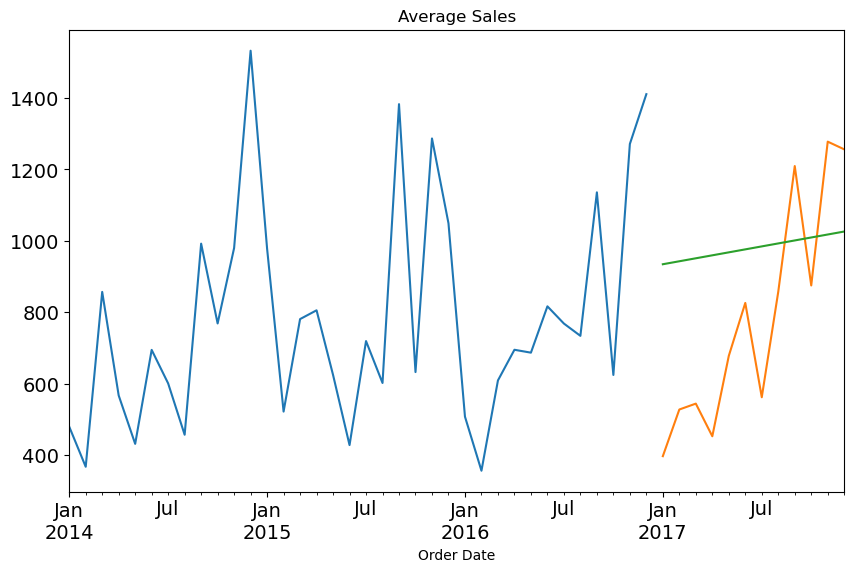

In [52]:
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot test data (orange)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot predicted sales value (green)

Insights: Here, we can see a straight line with some slope. It means, our model took trend into consideration and this trend is going upward.

our double smoothing model doesn't predicting sales value even close to the actual test value. So, our model is not performing good but it's better than simple exponential smoothing model.

Here, we can observe sales went to the peak after every 6 months. So, I can say after every 6 months, there is a seasonality pattern. So, if we add one more hyperparameter which is seasonality parameter , our model can perform better than the previous two models. So, let's go for Triple Exponential Smoothing model (Holt-Winter Model)

In [53]:
#Model Evaluation
fit1.aic  # calculate AIC score of the model

416.9527957656208

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

337.5376776259907


Using Holt's Winter Model predict the sales of Furniture for the given test data

In [55]:
#seasonal period=12 instead of 6 bec. I want to check it on yearly basis
from statsmodels.tsa.api import ExponentialSmoothing
fit1 = ExponentialSmoothing(train , seasonal_periods=12,trend='add',seasonal='add').fit() # train the model using Holt's winter algo.

In [56]:
fit1

In [57]:
Holt_Winter_df = test.copy() # copy test data

In [58]:
Holt_Winter_df

Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

In [59]:
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test)) #predict the sales for the given test data using the algorithm  and save in new column 

In [60]:
Holt_Winter_df['Holt_Winter']

2017-01-31     789.680002
2017-02-28     479.584746
2017-03-31     729.439092
2017-04-30     786.559971
2017-05-31     691.434912
2017-06-30     657.425831
2017-07-31     736.375203
2017-08-31     608.142531
2017-09-30    1273.170681
2017-10-31     791.498413
2017-11-30    1218.795003
2017-12-31    1370.720625
Freq: M, dtype: float64

<AxesSubplot:title={'center':'Average Sales'}, xlabel='Order Date'>

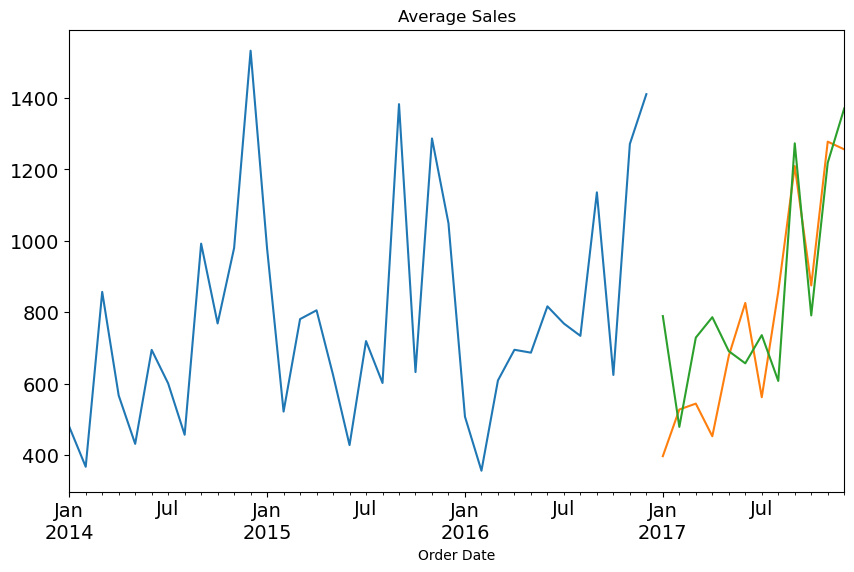

In [61]:
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot test data (orange)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot predicted sales value (green)

Insights: Now, predicted sales values are very close to the test value. Our Holt's Winter Model is performing better than previous two models bec. we added seasonality in the dataset.

In [62]:
#Model Evaluation
fit1.aic  # calculate AIC score of the model

392.39062473148135

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

193.7115308386924


conclusion: Holt's Winter Model has the lowest AIC score and lowest RMSE value. Therefore, it is the best model out of the three models

# Finally we can use Holt's Winter Model to do price predictions of the 'Furniture' product for the upcoming one year

We already have the dataset y having sales on monthly basis. So, first train the entire data(y) which is from 1st Jan 2014 to 31st Dec 2017 and then predict the sales of the Furniture for the upcoming one year i.e. from 1st Jan 2018 to 31st Dec 2018

In [64]:
#seasonalperiods = gamma(γ)
#seasonal period=12 months 
from statsmodels.tsa.api import ExponentialSmoothing
fit1 = ExponentialSmoothing(y, seasonal_periods=12,trend='add', seasonal='add').fit() # train the model using Holt's winter algo.

In [65]:
fit1

In [66]:
#predict the sales of the Furniture for the upcoming one year using the algorithm
#steps= 12 because we have to predict the sales of the Furniture for the upcoming one year / 12 months
Y_predictions = fit1.forecast(steps=12)

In [67]:
Y_predictions # these are the predicted price of the Furniture from 1st Jan 2018 to 31st Dec 2018 

2018-01-31     634.610051
2018-02-28     484.385986
2018-03-31     722.211499
2018-04-30     668.084427
2018-05-31     649.422006
2018-06-30     724.302087
2018-07-31     707.463743
2018-08-31     688.555938
2018-09-30    1216.975767
2018-10-31     755.936340
2018-11-30    1239.032471
2018-12-31    1354.748692
Freq: M, dtype: float64

<AxesSubplot:title={'center':'Average Sales'}, xlabel='Order Date'>

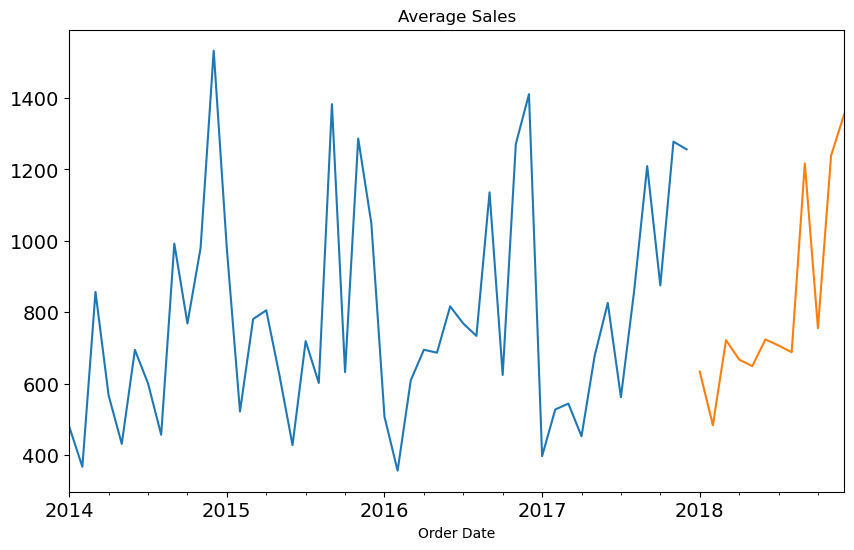

In [68]:
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot the data (blue)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) # plot predicted sales value(orange)

In [69]:
#Model Evaluation
fit1.aic  # calculate AIC score of the model

510.61878567845883

In [70]:
# save predicted price of the Furniture from 1st Jan 2018 to 31st Dec 2018 in an excel file
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)


Using ARIMA model first predict the sales of Furniture for the given test data and then predict the sales for the upcoming one year

Use ARIMA Model to do price predictions of the 'Furniture' product for the given test data

Note: Box-Jenkins Method is used to build the best ARIMA model using the optimum values of p,d,q

ARIMA model has p,d,q as hyperparameters => when we pass our dataset and p,d,q to auto_arima() function, this function goes to the entire dataset multiple times and calculates different values of p,d,q each time. This function finds the optimum values of p,d,q i.e. best ARIMA values for a particular dataset. We can build the best ARIMA model if we have the best values of p,d,q

In [71]:
# this code will give the optimum values of p,d,q
import pmdarima as pm
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.11 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.07 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.14 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.09 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.19 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.58 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.19 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.44 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

ARIMA(p,d,q)(p,d,q)[period of seasonality in months]

3,2,0 is trend order given by p,d,q values

1,1,0,12 is seasonal order given by p,d,q values and period of seasonality

In [72]:
#Model Evaluation
model.aic()  # calculate AIC score of the ARIMA model

489.4176261246744

In [73]:
# pass the optimum values of trend order and seasonal order to the SARIMAX func and then train the ARIMA model

from statsmodels.tsa.statespace.sarimax import SARIMAX  # Seasonal ARIMA
model = SARIMAX(train, order=(3,2,0),seasonal_order=(1,1,0,12)).fit() # train the model using seasonal ARIMA algo. 

In [74]:
model

In [75]:
#predict the sales of the Furniture for the given test data using the seasonal ARIMA algorithm
#steps= 12 because we have to predict the sales of the Furniture for the upcoming one year / 12 months
pred = model.get_forecast(steps=12)

In [76]:
pred 

In [77]:
pred.predicted_mean # predicted prices of the Furniture for the given test data ie. from 1st Jan 2017 to 31st Dec 2017

2017-01-31     818.524071
2017-02-28     468.470302
2017-03-31     744.079623
2017-04-30     634.497964
2017-05-31     535.745788
2017-06-30     390.163777
2017-07-31     559.376275
2017-08-31     421.341607
2017-09-30    1140.775336
2017-10-31     389.701095
2017-11-30    1011.052519
2017-12-31     834.732361
Freq: M, Name: predicted_mean, dtype: float64

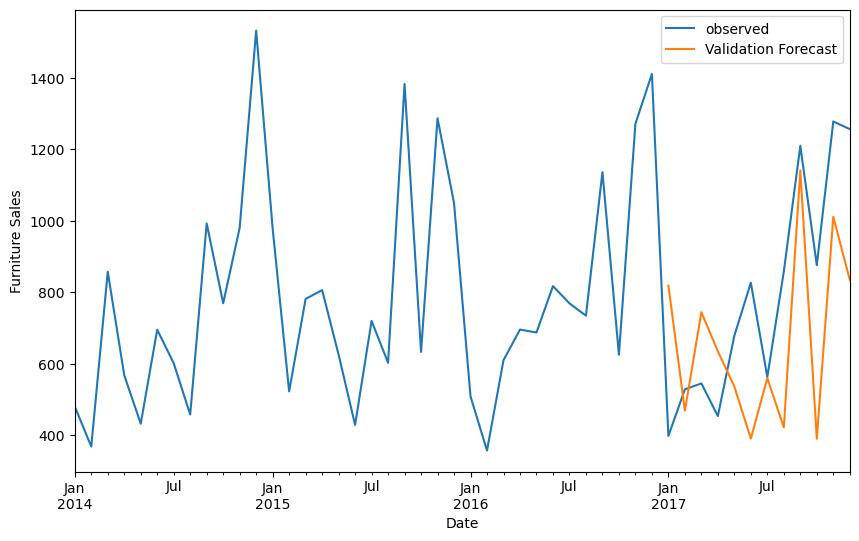

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed') # plot the data (blue) 
pred.predicted_mean.plot(ax=ax, label='Validation Forecast') # plot the predicted sales value(orange)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Calculate RMSE

In [79]:
Y_pred = pred.predicted_mean

In [80]:
Y_test = y['2017-01-31':]

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

308.7697286680307


# Use ARIMA Model to do price predictions of the 'Furniture' product for the upcoming one year

We already have the dataset y having sales on monthly basis

In [82]:
# pass the entire dataset to the function 
# fit function train our model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,order=(3,2,0),seasonal_order=(1,1,0,12)).fit() # train the model using seasonal ARIMA algo. 

In [83]:
model

In [84]:
#predict the sales of the Furniture for the upcoming one year using the algorithm
#steps= 12 because we have to predict the sales of the Furniture for the upcoming one year / 12 months

pred = model.get_forecast(steps=12)

In [85]:
pred 

In [86]:
pred.predicted_mean # predicted prices of the Furniture for upcoming one year ie. from 1st Jan 2018 to 31st Dec 2018

2018-01-31     481.175784
2018-02-28     504.162674
2018-03-31     534.896814
2018-04-30     623.058259
2018-05-31     658.537452
2018-06-30     789.387683
2018-07-31     619.269526
2018-08-31     736.930529
2018-09-30    1072.136429
2018-10-31     627.864108
2018-11-30    1161.662901
2018-12-31    1229.291177
Freq: M, Name: predicted_mean, dtype: float64

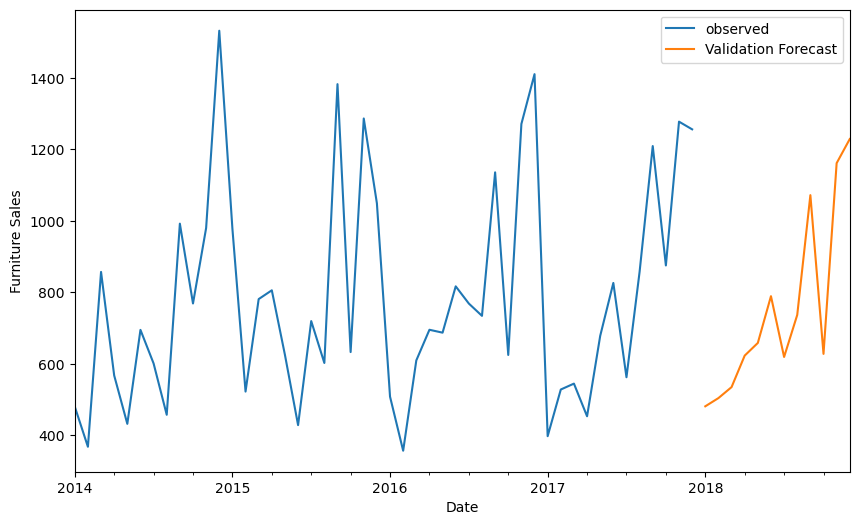

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed') # plot the data (blue)
pred.predicted_mean.plot(ax=ax, label='Validation Forecast') # plot the predicted sales value (orange)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [88]:
# save predicted price of the Furniture from 1st Jan 2018 to 31st Dec 2018 in an excel file
pred.predicted_mean.to_excel("TimeSeriesOutput_arima.xlsx",index=True)